In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fancy plots
plt.style.use('fivethirtyeight')

# Data frame library 
import pandas as pd

In [6]:
schoolpolutiondata = pd.read_csv('school polution.csv')
schoolpolutiondata

In [7]:
primary_data = schoolpolutiondata[schoolpolutiondata['Phase of education'] == 'Primary']

In [8]:
Absences = pd.read_csv('england_abs.csv')

In [9]:
Absences_polution=pd.merge(Absences, primary_data, on='URN')
Absences_polution = Absences_polution.drop (['Unnamed: 12', 'Close Date'], axis=1)

In [10]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [11]:
def all_floats (data_frame, colomn):
    '''
    This function selects strings that can be converted into floats
    Parameters:
    data_frame - data frame of the colomn in question
    column - string - name of colomn
    Returns:
    data frame where all the values in column are floats
    '''
    clean = np.zeros(len(data_frame[colomn]),dtype=bool)
    cnt = 0
    delete = 0
    for row in data_frame[colomn]:
        if row is not np.nan and isfloat(row) == True:
            clean[cnt] = True
        else:
            clean[cnt] = False
        cnt += 1
    Clean_data_frame = data_frame[clean]
    Clean_data_frame[colomn] = Clean_data_frame[colomn].astype(np.float)
    return Clean_data_frame

In [12]:
Clean_abs_pol= all_floats (Absences_polution, 'PPERSABS15')

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


clean = np.zeros(len(Absences_polution['PPERSABS15']),dtype=bool)
cnt = 0
delete = 0
for row in Absences_polution['PPERSABS15']:
    if row is not np.nan and isfloat(row) == True:
        clean[cnt] = True
    else:
        clean[cnt] = False
    cnt += 1

Clean_abs_pol = Absences_polution[clean]

In [13]:
Clean_abs_pol["PPERSABS15"] = Clean_abs_pol["PPERSABS15"].astype(np.float)

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel.kernelapp import IPKernelApp


In [14]:
#test
cnt = 0
a = 0
for i in Clean_abs_pol["PPERSABS15"]:
    a += 1
    if type(i) == float:
        cnt += 1
print [a,cnt]

[1471, 1471]


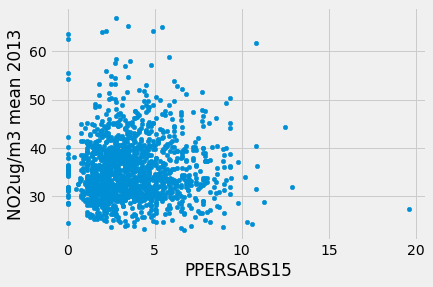

In [15]:
Clean_abs_pol.plot.scatter('PPERSABS15', 'NO2ug/m3 mean 2013')

In [16]:
Above = Clean_abs_pol.loc[Clean_abs_pol['Above limit']=='Yes']
Under = Clean_abs_pol.loc[Clean_abs_pol['Above limit']=='No']

In [17]:
PPERSABS15_Above_mean = np.mean(Above['PPERSABS15'])
PPERSABS15_Above_mean

3.8624573378839577

In [18]:
PPERSABS15_Above_median = np.median(Above['PPERSABS15'])
PPERSABS15_Above_median

3.5

In [19]:
PPERSABS15_Under_mean = np.mean(Under['PPERSABS15'])
PPERSABS15_Under_mean

3.6452461799660476

In [20]:
PPERSABS15_Under_median = np.median(Under['PPERSABS15'])
PPERSABS15_Under_median

3.3

In [21]:
PPERSABS15_General_mean = np.mean(Clean_abs_pol['PPERSABS15'])
PPERSABS15_General_mean

3.688511216859283

In [22]:
PPERSABS15_General_median = np.median(Clean_abs_pol['PPERSABS15'])
PPERSABS15_General_median

3.3

diffrence = 0.2

In [23]:
import scipy.stats as stats

In [24]:
observed_mean = PPERSABS15_Above_mean
general_mean_ratio = PPERSABS15_General_mean/len(Clean_abs_pol)#get ratio
expected_mean = general_mean_ratio*len(Above) #get expected counts
chi_squared_stat = sum((observed_mean-expected_mean)**2)/expected_mean
print chi_squared_stat

TypeError: 'float' object is not iterable

In [25]:
import numpy as np
from scipy.stats import chi2_contingency

In [26]:
achievement_pollution_tab = np.zeros((2, 2))
achievement_pollution_tab

array([[0., 0.],
       [0., 0.]])

In [27]:
achievement_pollution_tab[0, 0] = count_for_high_high
achievement_pollution_tab[0, 1] = count_for_high_low
achievement_pollution_tab[1, 0] = count_for_low_high
achievement_pollution_tab[1, 1] = count_for_low_low

NameError: name 'count_for_high_high' is not defined

In [29]:
Absences_polution = pd.merge(Absences, primary_data, on='URN')

In [30]:
Absences = pd.read_csv('england_abs.csv')

In [31]:
Absences_polution.loc[Absences_polution['Above limit']=='Yes']